### Libraries

In [212]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Strategy
from backtesting import Backtest
from backtesting.test import SMA
from backtesting.lib  import crossover
from datetime    import datetime

### OHLC data and EDA

In [213]:
# read in csv data
df = pd.read_csv("EURUSD_Daily_201201020000_202112310000.csv",sep="\t")
# create 'date' columns as datetime obj
df['date'] = pd.to_datetime(df['<DATE>'])
# drop unwanted columns
df.drop(columns=['<DATE>','<TICKVOL>','<VOL>', '<SPREAD>'], inplace=True)
# rename columns
df.columns = ['open','high','low','close','date']
# set date as index 
df.set_index('date', inplace=True)
df.shape

(2661, 4)

### Strategy

In [214]:
class SmaCross(Strategy):
    n1 = 21
    n2 = 50
    n3 = 100
        
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma3 = self.I(SMA, self.data.Close, self.n3)
        
    def next(self):
        
        if self.sma1 > self.sma2 > self.sma3:
            if crossover(self.data.Close, self.sma1):
                self.position.close()
                self.buy()
                        
        elif self.sma1 < self.sma2 < self.sma3:
            if crossover(self.sma1,self.data.Close):
                self.position.close()
                self.sell()

In [215]:
# rename to match Backtesting library
df.columns = ['Open', 'High', 'Low', 'Close']
backtest = Backtest(df, SmaCross, cash=10000,commission=.002)
stats, heatmap = backtest.optimize(
    n1=range(10, 50, 10),
    n2=range(50, 100, 10),
    n3=range(100, 201, 10),
    maximize='Return [%]',
    return_heatmap=True)

  0%|          | 0/17 [00:00<?, ?it/s]

In [216]:
stats

Start                     2012-01-02 00:00:00
End                       2021-12-31 00:00:00
Duration                   3651 days 00:00:00
Exposure Time [%]                   91.845171
Equity Final [$]                 11063.793347
Equity Peak [$]                   12794.16952
Return [%]                          10.637933
Buy & Hold Return [%]              -12.113996
Return (Ann.) [%]                    0.961959
Volatility (Ann.) [%]                7.304951
Sharpe Ratio                         0.131686
Sortino Ratio                        0.189546
Calmar Ratio                         0.054095
Max. Drawdown [%]                   -17.78291
Avg. Drawdown [%]                   -1.404823
Max. Drawdown Duration     2485 days 00:00:00
Avg. Drawdown Duration       95 days 00:00:00
# Trades                                   72
Win Rate [%]                        44.444444
Best Trade [%]                      12.196663
Worst Trade [%]                      -9.42318
Avg. Trade [%]                    

In [217]:
hm1 = heatmap.groupby(['n1','n2']).mean().unstack()
hm2 = heatmap.groupby(['n1','n3']).mean().unstack()
hm3 = heatmap.groupby(['n2','n3']).mean().unstack()

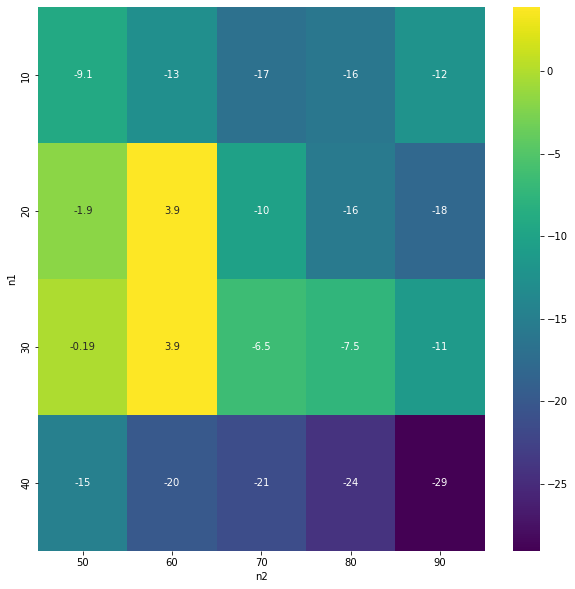

In [218]:
plt.figure(figsize=(10,10))
sns.heatmap(hm1, cmap='viridis', annot=True);

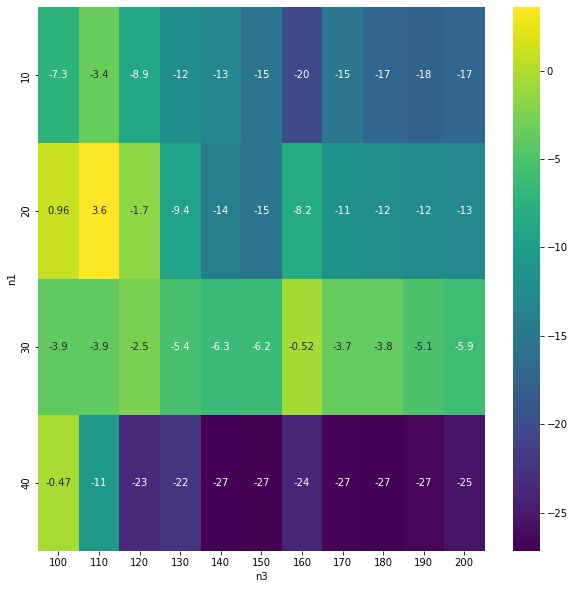

In [219]:
plt.figure(figsize=(10,10))
sns.heatmap(hm2, cmap='viridis', annot=True);

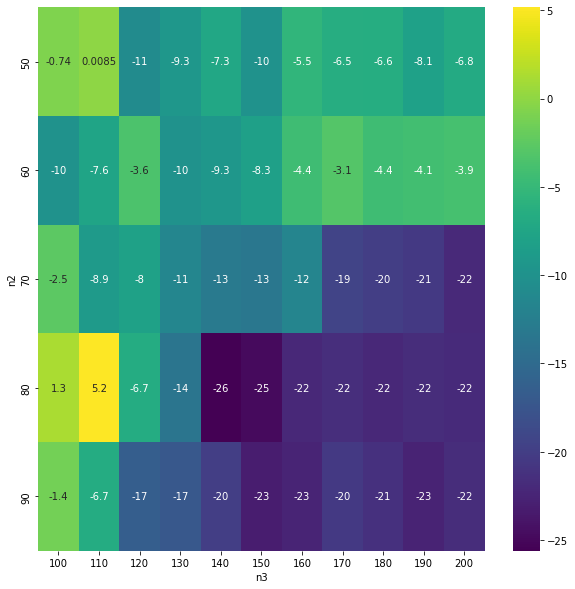

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(hm3, cmap='viridis', annot=True);

In [221]:
# best params
stats[27]

<Strategy SmaCross(n1=30,n2=60,n3=160)>